# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests


df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

df2=pd.read_csv('image-predictions.tsv',sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [3]:
import json
df3=[]
url='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r=requests.get(url)
with open('tweet-json.txt',mode='rb')as file:
    for line in file:
        df3.append(json.loads(line))

df3=pd.DataFrame(df3)
df3.head()


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
df3.rename(columns={'id':'tweet_id'},inplace=True)

In [5]:
df1=df1[df1['retweeted_status_id'].isnull()]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
tweet_id                         2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [9]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
295,837471256429613056,NaN,NaN,2017-03-03 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's suave as h*ck. Will be y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837471256...,12,10,Vincent,None,None,None,None
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None


In [10]:
df3[df3['tweet_id'].duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [11]:
df1[df1['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


### Quality issues
1.In df1 data frame 'time stamp' column, both date and time are combined within this column

2.In df1 data frame, we could find that in the content of 'source' column, there is still unnecessary words

3.In df1 data frame, there are some Nan value which can be found in 'expanded-url' column

4.In df1 data frame, the data type of time and date columns are object

5.In df1 data frame 'text' column, the initial letters are using capitalize letter (Upper case)

6.In df1 data frame 'name' column, some of the initial letters are using capitalize letter (Upper case)

7.In df2 data frame 'p1','p2','p3' columns, the initiaal letters are upper case

8.In df3 data frame, there are so many unrequired columns for further analysis


### Tidiness issues

1.There are some type of dogs which act as name of column

2.'tweet_id' columns are spread all around within the 3 data sets of df1,df2 and df3

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [12]:
# Make copies of original pieces of data
df1c=df1.copy()
df2c=df2.copy()
df3c=df3.copy()

### Issue #1:

#### Define:
It is necessary to separate date and time from time stamp column by using split function, and make it into two new columns

#### Code

In [13]:
df1c['timestamp'][0]

'2017-08-01 16:23:56 +0000'

In [14]:
df1c['date']=df1c['timestamp'].str.split(' ')
df1c['date']=df1c['date'].str[:-2].str[0]
df1c['time']=df1c['timestamp'].str.split(' ')
df1c['time']=df1c['time'].str[1:2].str[0]

#### Test

In [15]:
df1c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Issue #2:

#### Define
Unnecessary word in 'source' column need to be eliminated by applying string slicing

#### Code

In [16]:
df1c['source']=df1c['source'].str[len('<a href="'):-len('" rel="nofollow">Twitter for iPhone</a>')]


#### Test

In [17]:
df1c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Issue 3

#### Define
The nan value which resides in 'expanded-url' column in df1 dataframe, need to be eliminated by using dropna function

#### Code

In [18]:
df1c.dropna(subset=['expanded_urls'],axis=0,inplace=True)

#### Test

In [19]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
date                          2117 non

### Issue 4

#### Define
Change the data type of both column date and time in df1 dataframe to datetime format by converting it using to datetime

#### Code

In [20]:
df1c['date']=pd.to_datetime(df1c['date'])
df1c['time']=pd.to_datetime(df1c['time'])

#### Test

In [21]:
df1c['date'].dtype,df1c['time'].dtype
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
date                          2117 non

### Issue 5

#### Define
It is required to change initial letter in 'text' column df1 dataframe by using str.lower for easier to analyze the data

#### Code

In [22]:
df1c['text']=df1c['text'].str.lower()

#### Test

In [23]:
df1c['text']

0       this is phineas. he's a mystical boy. only eve...
1       this is tilly. she's just checking pup on you....
2       this is archie. he is a rare norwegian pouncin...
3       this is darla. she commenced a snooze mid meal...
4       this is franklin. he would like you to stop ca...
5       here we have a majestic great white breaching ...
6       meet jax. he enjoys ice cream so much he gets ...
7       when you watch your owner call another dog a g...
8       this is zoey. she doesn't want to be one of th...
9       this is cassie. she is a college pup. studying...
10      this is koda. he is a south australian decksha...
11      this is bruno. he is a service shark. only get...
12      here's a puppo that seems to be on the fence a...
13      this is ted. he does his best. sometimes that'...
14      this is stuart. he's sporting his favorite fan...
15      this is oliver. you're witnessing one of his m...
16      this is jim. he found a fren. taught him how t...
17      this i

### Issue 6

#### Define
Change the initial letter of 'name' column in df1 dataframe to lowercase

#### Code

In [24]:
df1c['name']=df1c['name'].str.lower()

#### Test

In [25]:
df1c['name']

0        phineas
1          tilly
2         archie
3          darla
4       franklin
5           none
6            jax
7           none
8           zoey
9         cassie
10          koda
11         bruno
12          none
13           ted
14        stuart
15        oliver
16           jim
17          zeke
18       ralphus
20        gerald
21       jeffrey
22          such
23        canela
24          none
25          none
26          maya
27        mingus
28         derek
29        roscoe
31       waffles
          ...   
2326       quite
2327           a
2328        none
2329        none
2330        none
2331        none
2332        none
2333          an
2334           a
2335          an
2336        none
2337        none
2338        none
2339        none
2340        none
2341        none
2342        none
2343        none
2344        none
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        none
2352           a
2353          

### Issue 7

#### Define
Change initial letter in the df2 dataframe column of p1,p2,p3 with lower case

#### Code

In [26]:
df2c['p1']=df2c['p1'].str.lower()
df2c['p2']=df2c['p2'].str.lower()
df2c['p3']=df2c['p3'].str.lower()

#### Test

In [27]:
df2c[['p1','p2','p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


### Issue 8

#### Define
In df3 dataframe, unrequired columns for further analysis need to be dropped by using drop function. As a minimum requirement will be kept 'tweet_id','retweet_count' and favorite_count columns

#### Code

In [28]:
df3c.drop(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities','favorited','id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'full_text', 'geo','retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],axis=1,inplace=True)

#### Test

In [29]:
df3c=pd.DataFrame(df3c,columns=['tweet_id','favorite_count','retweet_count'])
df3c.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Tidiness Issue

### Issue 1

#### Define
Dog type/stage in each column of df1 dataframe should be relocated and change to value of column by categorizing the values of each dog type/stage, replace 'None' word content into blank value, make new column then combine all the dog type/stage inside of it.

#### Code

In [30]:
df1c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,this is phineas. he's a mystical boy. only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None,2017-08-01,2022-03-15 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,this is tilly. she's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,None,None,None,2017-08-01,2022-03-15 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,this is archie. he is a rare norwegian pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,archie,None,None,None,None,2017-07-31,2022-03-15 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,this is darla. she commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,darla,None,None,None,None,2017-07-30,2022-03-15 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,this is franklin. he would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,None,None,None,None,2017-07-29,2022-03-15 16:00:24


In [31]:
df1c['doggo'].replace('None','',inplace=True)
df1c['floofer'].replace('None','',inplace=True)
df1c['pupper'].replace('None','',inplace=True)
df1c['puppo'].replace('None','',inplace=True)
df1c.groupby(['doggo','floofer','pupper','puppo']).size().reset_index().rename(columns={0:'count'})
df1c['dog_stage']=df1c['doggo']+df1c['floofer']+df1c['pupper']+df1c['puppo']
df1c.loc[df1c.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df1c.loc[df1c.dog_stage=='doggofloofer','dog_stage']='doggo,floofer'
df1c.loc[df1c.dog_stage=='doggopuppo','dog_stage']='doggo,puppo'
df1c.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)


#### Test

In [32]:
df1c['dog_stage'].value_counts()

                 1779
pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Issue 2

#### Define
Combine the 'tweet_id' columns as well as another variables which currently spread in 3 data sets into 1 data set/dataframe by using merge function.

#### Code

In [33]:
df12c=pd.merge(df1c,df2c,on=['tweet_id'])
dftot=pd.merge(df12c,df3c,on=['tweet_id'])

#### Test

In [34]:
dftot.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'time', 'dog_stage', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [35]:
dftot.to_csv('twitter_archive_master.csv',index=False)

In [36]:
dftot.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,this is phineas. he's a mystical boy. only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,this is tilly. she's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,this is archie. he is a rare norwegian pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,this is darla. she commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,this is franklin. he would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [37]:
dftot['rating_numerator'].sort_values(ascending=False)

726     1776
1718     420
848      204
662      165
1435     144
1302     143
1303     121
946       99
1494      88
323       84
970       80
503       75
1054      60
925       50
988       45
1130      44
553       27
1374      26
385       24
786       14
147       14
146       14
64        14
362       14
153       14
162       14
634       14
119       14
95        14
165       14
        ... 
915        3
554        3
1487       3
1574       3
1547       3
1972       3
1826       3
1844       3
1780       3
1273       3
1880       3
1592       3
1106       3
1167       3
1422       2
1948       2
1723       2
1887       2
1566       2
1878       2
1419       2
1964       2
1987       2
1976       1
1519       1
1900       1
1973       1
1735       1
756        0
235        0
Name: rating_numerator, Length: 1994, dtype: int64

In [38]:
dftot['date'].value_counts()

2015-11-28    26
2015-11-29    26
2015-11-16    25
2015-12-01    23
2015-11-19    23
2015-11-25    21
2015-12-07    20
2015-11-20    20
2015-11-22    20
2015-11-23    20
2015-12-08    19
2015-12-03    18
2015-12-10    17
2015-11-21    17
2015-11-18    17
2015-11-30    17
2015-11-24    17
2015-11-27    17
2015-12-12    16
2015-12-09    16
2015-12-06    16
2015-12-11    16
2015-11-17    15
2015-12-04    14
2015-12-02    14
2015-12-24    13
2015-12-15    13
2015-12-05    13
2015-11-26    12
2015-12-13    11
              ..
2017-01-08     1
2017-02-19     1
2016-04-10     1
2016-09-09     1
2017-03-15     1
2017-03-28     1
2017-07-30     1
2017-05-23     1
2017-01-19     1
2016-12-02     1
2016-02-03     1
2016-09-04     1
2017-04-05     1
2016-05-28     1
2017-05-06     1
2016-06-12     1
2017-03-20     1
2016-10-14     1
2016-08-14     1
2017-04-19     1
2016-09-17     1
2016-10-19     1
2016-07-15     1
2016-05-14     1
2017-07-23     1
2016-12-31     1
2017-03-05     1
2016-10-28    

In [39]:
dftot['p1'].value_counts()

golden_retriever             139
labrador_retriever            95
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       40
pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     19
shetland_sheepdog             18
eskimo_dog                    18
teddy                         18
maltese_dog                   18
beagle                        17
cardigan                      17
shih-tzu                      17
rottweiler                    17
lakeland_terrier              16
kuvasz                        16
italian_greyhound             16
web_site                      15
          

In [40]:
dfimg=dftot['img_num'].value_counts().index

### Insights:
1.The highest rating numerator which been given by user is 1776

2.Mostly user access and give dog rating in November 28th and 29th 2015

3.The top 5 image prediction of dog type in p1 as follow, golden retriever,labrador retriever,pembroke,chihuahua, and pug

### Visualization

Text(0.5,1,'Number of Image')

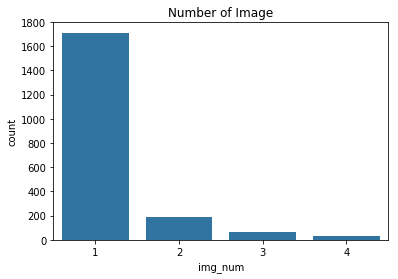

In [41]:
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline
colind=sb.color_palette()[0]
sb.countplot(data=dftot,x='img_num',order=dfimg,color=colind)
plt.title('Number of Image')